<a href="https://colab.research.google.com/github/yuki-2000/Image_processing_lecture/blob/main/IP2022_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### 初期設定（このセルの中身は触らなくて良い）
import numpy as np # 数値解析パッケージnumpyのimport
import cv2 # 画像処理パッケージopencvのimport
import matplotlib.pyplot as plt # 描画パッケージmatplotlibのimport
import imutils

# Google Colab固有の設定
from google.colab import files
from google.colab.patches import cv2_imshow

# Google driveのmount
from google.colab import drive
drive.mount('/content/drive/')
# Google Colab用directoryに移動
%cd "/content/drive/MyDrive/Colab Notebooks/画像処理/"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/画像処理/画像処理/'
/content


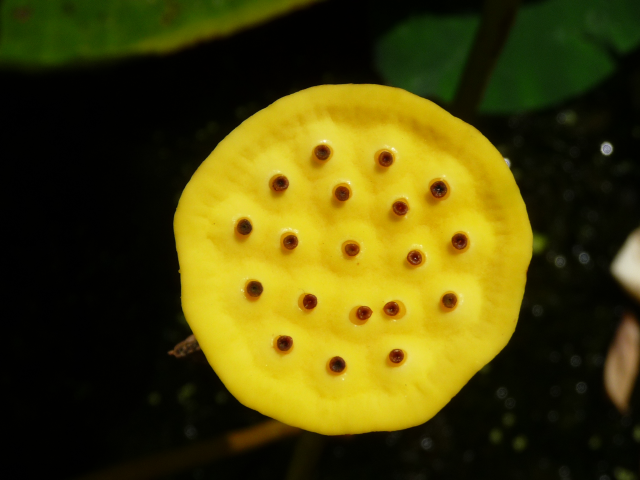

In [ ]:
### 1-1: 画像の読込と表示（このセルの中身は触らなくて良い）
img = imutils.url_to_image('https://bit.ly/3VQeHqI')

# 読み込めなかった場合の例外処理
if img is None:
  print('Image file not found.')

# 画像の表示
cv2_imshow(img)

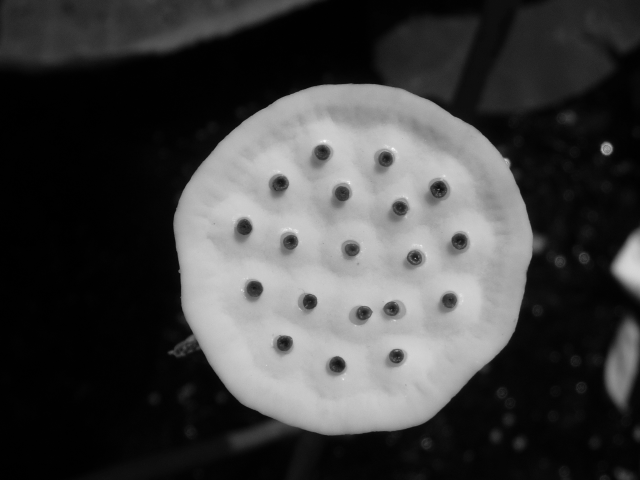

In [ ]:
### 1-2: 色空間の変換，画像の書き出し（このセルの中身は触らなくて良い）
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 画像の表示
cv2_imshow(gray_img)

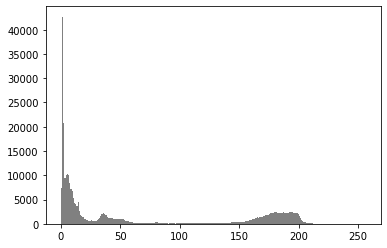

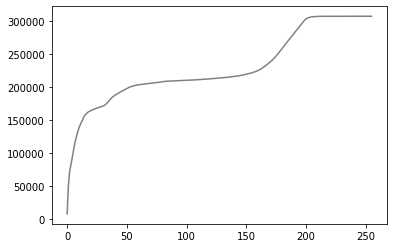

In [ ]:
### 2-1 濃淡ヒストグラムの描画

# ヒストグラム
hist, bins = np.histogram(gray_img.flatten(), bins=256, range=[0,256])
plt.hist(gray_img.flatten(), bins=256, range=[0,256], color="gray")
plt.show()
# 累積ヒストグラム
cum_hist = hist.cumsum()
plt.plot(cum_hist, color="gray")

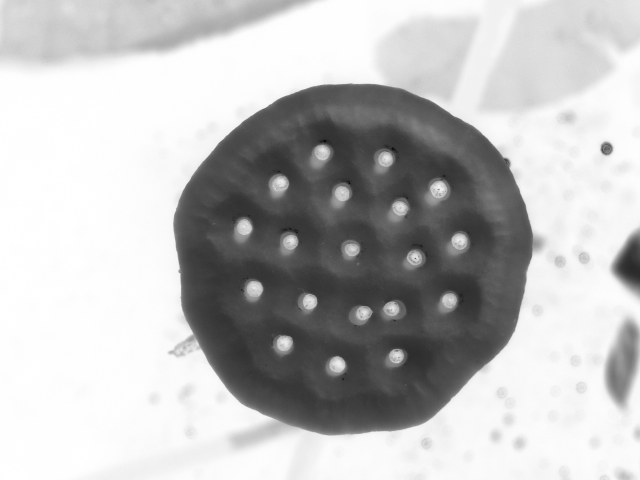

In [ ]:
### 2-2a 階調変換関数の適用（反転）

# 準備
rows, cols = gray_img.shape # 画像の大きさを取得
trans_gray_img = np.zeros((rows, cols), np.uint8) # 変換結果を記録する黒い画像を用意

# ラスタ走査して画素毎に変換
for x in range(0, rows):
  for y in range(0, cols):
    trans_gray_img[x,y] = 255 - gray_img[x,y]


# 変換後の画像を表示
cv2_imshow(trans_gray_img)

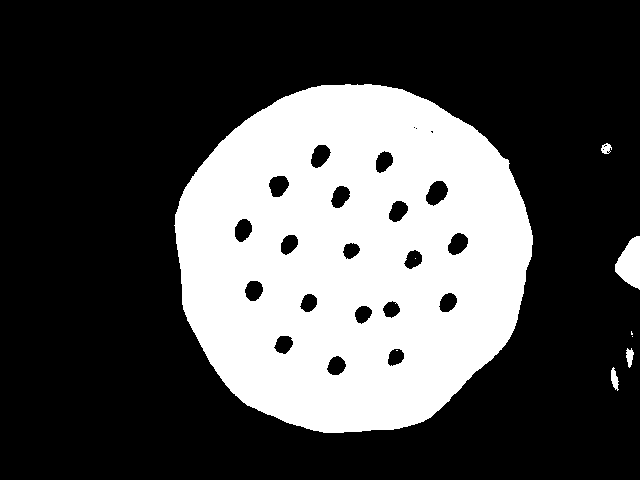

In [ ]:
### 2-2b 階調変換関数の適用（2値化）

# 準備
rows, cols = gray_img.shape # 画像の大きさを取得
trans_gray_img = np.zeros((rows, cols), np.uint8) # 変換結果を記録する黒い画像を用意


# ラスタ走査して画素毎に変換
for x in range(0, rows):
  for y in range(0, cols):
    if gray_img[x,y] > 127:
      trans_gray_img[x,y] = 255
    else:
      trans_gray_img[x,y] = 0

# 変換後の画像を表示
cv2_imshow(trans_gray_img)

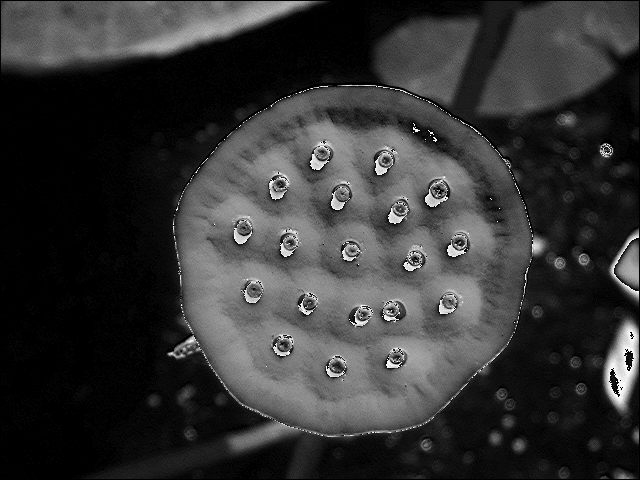

In [ ]:
### 2-3a 画像領域でのフィルタリング（先鋭化）

# 準備
 # 変換結果を記録する黒い画像を用意
rows, cols = gray_img.shape # 画像の大きさを取得
filterd_img = np.zeros((rows, cols), np.uint8) # 変換結果を記録する黒い画像を用意
 # 3x3のマスク画像を用意
mask = np.array([[0,-1,0],
                 [-1,5,-1],
                 [0,-1,0]])


# ラスタ走査して画素毎に変換（画像の縁から上下左右に1画素ずつ内側で処理）
for x in range(1, rows-1):
  for y in range(1, cols-1):

    # 各画素の近傍でマスク画像を畳み込み
    tmp_pixel = 0
    for i in range(-1,2):
      for j in range(-1,1):
        tmp_pixel += gray_img[x+i, y+j] * mask[i+i, 1+j]
    
    # 雑音除去
    if tmp_pixel > 4:
      filterd_img[x,y] = tmp_pixel
    else:
      filterd_img[x,y] = 0



# 変換後の画像を表示
cv2_imshow(filterd_img)

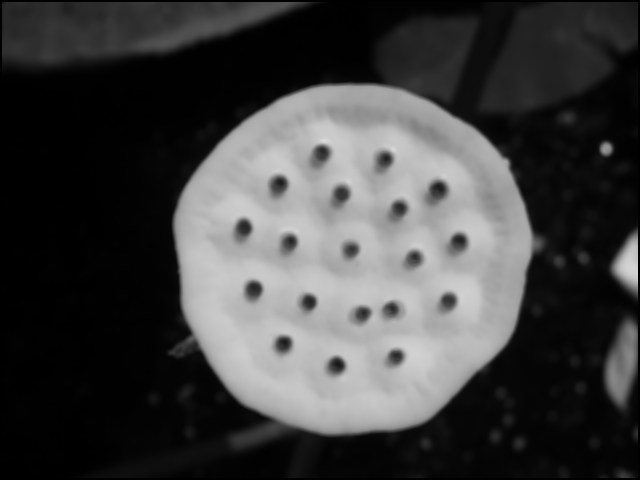

In [ ]:
### 2-3b 画像領域でのフィルタリング（移動平均フィルタ）

# 準備

 # 変換結果を記録する黒い画像を用意
rows, cols = gray_img.shape # 画像の大きさを取得
filterd_img = np.zeros((rows, cols), np.uint8) # 変換結果を記録する黒い画像を用意
 # 5x5のマスク画像を用意
mask = np.array([[1,1,1,1,1],
                 [1,2,2,2,1],
                 [1,2,3,2,1],
                 [1,2,2,2,1],
                 [1,1,1,1,1]])



# ラスタ走査して画素毎に変換（画像の縁から上下左右に2画素ずつ内側で処理）

for x in range(2, rows-2):
  for y in range(2, cols-2):

    # 各画素の近傍でマスク画像を畳み込み
    tmp_pixel = 0
    for i in range(-2,3):
      for j in range(-2,3):
        tmp_pixel += gray_img[x+i, y+j] * mask[i+i, 1+j]
    filterd_img[x,y] = tmp_pixel/35
    

    # 各画素の近傍でマスク画像を畳み込み

# 変換後の画像を表示
cv2_imshow(filterd_img)

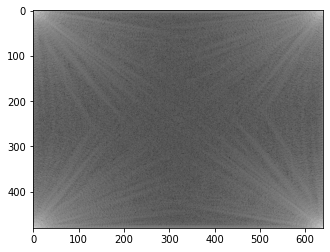

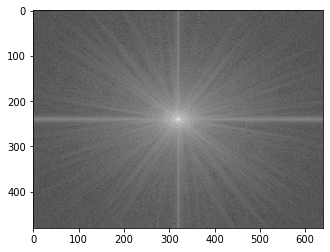

In [ ]:
### 2-4a 周波数領域への変換

# DFT
fft = np.fft.fft2(gray_img)
magnitude_spwctrum = 20 * np.log(np.abs(fft))
# 結果の表示
plt.imshow(magnitude_spwctrum, cmap="gray")
plt.show()

# 光学的DFT
fft_shift = np.fft.fftshift(fft) # 原点の位置をずらす
magnitude_spwctrum = 20 * np.log(np.abs(fft_shift))
# 結果の表示
plt.imshow(magnitude_spwctrum, cmap="gray")
plt.show()

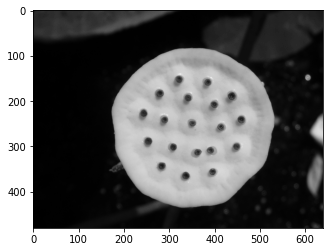

In [ ]:
### 2-4b 周波数領域からの復元（逆変換）
fft_ishift = np.fft.ifftshift(fft_shift) # 原点の位置を元に戻す
gray_img_back = np.fft.ifft2(fft_ishift) # 逆DFT
gray_img_back = np.abs(gray_img_back)# 逆変換の結果は複素数になっているので絶対値をとる

# 結果の表示
plt.imshow(gray_img_back, cmap="gray")
plt.show()

<ipython-input-36-2c2c0f7c74e1>:16: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20 * np.log(np.abs(masked_fft_shift))


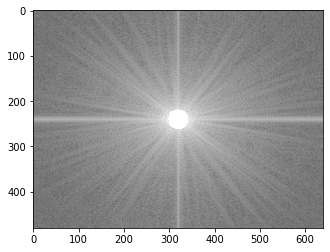

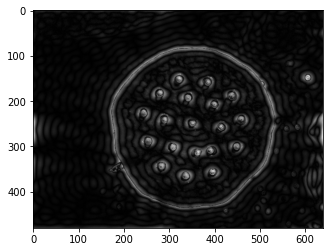

In [ ]:
### 2-5a 周波数領域でのフィルタリング（高域通過フィルタ）

# 準備
mask = np.zeros((rows, cols)) # フィルタの初期化
r = 20 # 円形領域の半径

# フィルタの設計（光学的DFT画像の中心部の円形領域）
for x in range(rows):
  for y in range(0, cols):
    if (x- int(rows/2)) ** 2 + (y-int(cols/2))**2 > r**2:
      mask[x,y] = 1


# 元の光学的DFT画像にマスクを適用
masked_fft_shift = fft_shift * mask
magnitude_spectrum = 20 * np.log(np.abs(masked_fft_shift))

# 結果の表示
plt.imshow(magnitude_spectrum, cmap="gray")
plt.show()

# 周波数領域からの復元（逆変換）
 # 原点の位置を元に戻す
 # 逆DFT
 # 逆変換の結果は複素数になっているので絶対値をとる
fft_ishift = np.fft.ifftshift(masked_fft_shift) # 原点の位置を元に戻す
gray_img_back = np.fft.ifft2(fft_ishift) # 逆DFT
gray_img_back = np.abs(gray_img_back)# 逆変換の結果は複素数になっているので絶対値をとる
# 画像の表示
plt.imshow(gray_img_back, cmap="gray")
plt.show()


<ipython-input-37-72fc7bd38ed3>:18: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20 * np.log(np.abs(masked_fft_shift))


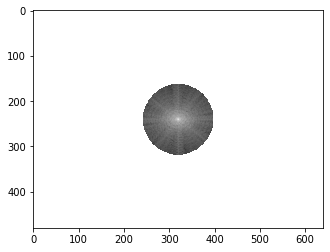

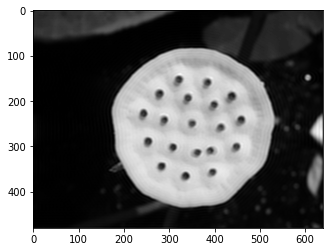

In [ ]:
### 2-5b 周波数領域でのフィルタリング（低域通過フィルタ）

# 準備
 # フィルタの初期化
 # 円形領域の半径
# 準備
mask = np.zeros((rows, cols)) # フィルタの初期化
r = 80 # 円形領域の半径

# フィルタの設計（光学的DFT画像の中心部の円形領域）
for x in range(rows):
  for y in range(0, cols):
    if (x- int(rows/2)) ** 2 + (y-int(cols/2))**2 < r**2:
      mask[x,y] = 1

# 元の光学的DFT画像にマスクを適用
masked_fft_shift = fft_shift * mask
magnitude_spectrum = 20 * np.log(np.abs(masked_fft_shift))

# 結果の表示
plt.imshow(magnitude_spectrum, cmap="gray")
plt.show()

# 周波数領域からの復元（逆変換）
 # 原点の位置を元に戻す
 # 逆DFT
 # 逆変換の結果は複素数になっているので絶対値をとる
fft_ishift = np.fft.ifftshift(masked_fft_shift) # 原点の位置を元に戻す
gray_img_back = np.fft.ifft2(fft_ishift) # 逆DFT
gray_img_back = np.abs(gray_img_back)# 逆変換の結果は複素数になっているので絶対値をとる
# 画像の表示
plt.imshow(gray_img_back, cmap="gray")
plt.show()
